# Wild Fire Prediction Experiment

Dataset links:


*   https://cwfis.cfs.nrcan.gc.ca/datamart
*   https://cwfis.cfs.nrcan.gc.ca/ha/nfdb?type=pnt&year=2023



# Importing Required Python Libraries

In [ ]:
#Importing Libraries

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix


Mounted at /content/drive


In [ ]:
# Loading the dataset

file_path = './data/NFDB_point_txt/NFDB_point_20240613.txt' 
df = pd.read_csv(file_path)

<ipython-input-3-5c40a548b677>:5: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# Exploratory Data Analysis & feature Investigation

In [4]:
df.head()

,FID,NFDBFIREID,SRC_AGENCY,NAT_PARK,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,...,CAUSE,CAUSE2,FIRE_TYPE,RESPONSE,PROTZONE,PRESCRIBED,MORE_INFO,CFS_NOTE1,CFS_NOTE2,ACQ_DATE
0,0,BC-2023-2023-C23369,BC,,2023-C23369,C23369,51.8197,-122.0729,2023,9,...,H,H,Fire,FUL,,,NE of Alkali Creek,,,2024-05-06 00:00:00
1,1,BC-2023-2023-R50580,BC,,2023-R50580,KITSELAS ROAD,54.5692,-128.4611,2023,6,...,H,H,Fire,FUL,,,N of 12km on Kitselas Rd,,,2024-05-06 00:00:00
2,2,BC-2023-2023-K40937,BC,,2023-K40937,,50.1166,-119.2738,2023,6,...,H,H,Fire,FUL,,,Oyama Lake,,,2024-05-06 00:00:00
3,3,BC-2023-2023-R10108,BC,,2023-R10108,LAUREL ROAD,54.2270,-125.6543,2023,4,...,H,H,Fire,FUL,,,Laurel Rd,,,2024-05-06 00:00:00
4,4,BC-2023-2023-K50058,BC,,2023-K50058,Campbell Mountain,49.5187,-119.5348,2023,4,...,H,H,Fire,FUL,,,Campbell Mountain,,,2024-05-06 00:00:00


In [5]:
df.columns

Index(['FID', 'NFDBFIREID', 'SRC_AGENCY', 'NAT_PARK', 'FIRE_ID', 'FIRENAME',
       'LATITUDE', 'LONGITUDE', 'YEAR', 'MONTH', 'DAY', 'REP_DATE',
       'ATTK_DATE', 'OUT_DATE', 'SIZE_HA', 'CAUSE', 'CAUSE2', 'FIRE_TYPE',
       'RESPONSE', 'PROTZONE', 'PRESCRIBED', 'MORE_INFO', 'CFS_NOTE1',
       'CFS_NOTE2', 'ACQ_DATE'],
      dtype='object')

In [6]:
df[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,51.819700,-122.072900
1,54.569200,-128.461100
2,50.116600,-119.273800
3,54.227000,-125.654300
4,49.518700,-119.534800
...,...,...
436559,56.456850,-116.077467
436560,54.966217,-115.570850
436561,55.350571,-117.119320
436562,56.177685,-116.799293


In [7]:
df[['NFDBFIREID', 'SRC_AGENCY', 'FIRE_ID', 'YEAR', 'MONTH', 'DAY', 'REP_DATE']]

,NFDBFIREID,SRC_AGENCY,FIRE_ID,YEAR,MONTH,DAY,REP_DATE
0,BC-2023-2023-C23369,BC,2023-C23369,2023,9,27,2023-09-27 00:00:00
1,BC-2023-2023-R50580,BC,2023-R50580,2023,6,2,2023-06-02 00:00:00
2,BC-2023-2023-K40937,BC,2023-K40937,2023,6,27,2023-06-27 00:00:00
3,BC-2023-2023-R10108,BC,2023-R10108,2023,4,28,2023-04-28 00:00:00
4,BC-2023-2023-K50058,BC,2023-K50058,2023,4,17,2023-04-17 00:00:00
...,...,...,...,...,...,...,...
436559,AB-2023-PWF016,AB,PWF016,2023,4,27,2023-04-27 00:00:00
436560,AB-2023-SWF055,AB,SWF055,2023,5,3,2023-05-03 00:00:00
436561,AB-2023-GWF031,AB,GWF031,2023,5,21,2023-05-21 00:00:00
436562,AB-2023-PWF128,AB,PWF128,2023,8,2,2023-08-02 00:00:00


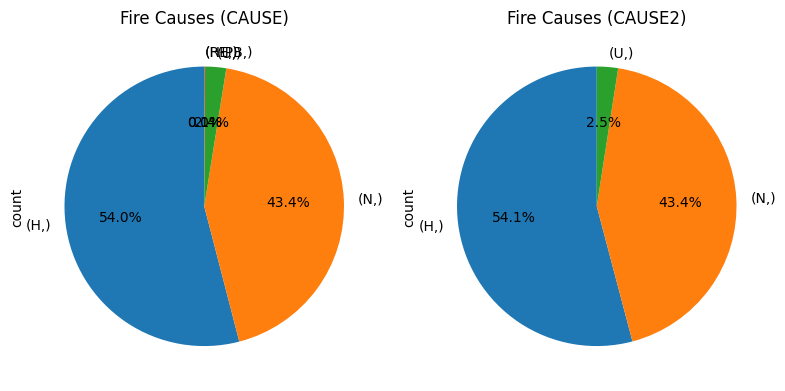

In [8]:
cause_counts = df[['CAUSE']].value_counts()
cause_counts_at = df[['CAUSE2']].value_counts()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
cause_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Fire Causes (CAUSE)')

plt.subplot(1, 2, 2)
cause_counts_at.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Fire Causes (CAUSE2)')

plt.tight_layout()
plt.show()


In [9]:
df[['FIRE_TYPE']].value_counts()

,count
FIRE_TYPE,
Fire,153473
,142581
IFR,64075
Wildfire,29434
Surface,28878
Ground,10062
Crown,3436
Forest,1487
Grass,1238


In [10]:
df[['RESPONSE']].value_counts()

,count
RESPONSE,
,379895
FUL,26247
SUP,20806
MON,7700
MOD,1485
PRO,286
Actioned,103
MNP,17
MDP,14


In [11]:
df[['PROTZONE']].value_counts()

,count
PROTZONE,
,348828
Intensive,62694
Initial Attack,3158
MON-Monitored,3117
EXT,3055
Nordique,2949
FUL-R (High Priority),2745
G (Low Priority),1327
W (Observation Zone),1062


In [12]:
df[['PRESCRIBED']].value_counts()

,count
PRESCRIBED,
,436003
PB,341
No,220


In [13]:
df[['SRC_AGENCY', 'FIRE_ID', 'YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE', 'SIZE_HA']]

,SRC_AGENCY,FIRE_ID,YEAR,MONTH,DAY,LATITUDE,LONGITUDE,SIZE_HA
0,BC,2023-C23369,2023,9,27,51.819700,-122.072900,0.010
1,BC,2023-R50580,2023,6,2,54.569200,-128.461100,1.400
2,BC,2023-K40937,2023,6,27,50.116600,-119.273800,0.009
3,BC,2023-R10108,2023,4,28,54.227000,-125.654300,1.100
4,BC,2023-K50058,2023,4,17,49.518700,-119.534800,0.009
...,...,...,...,...,...,...,...,...
436559,AB,PWF016,2023,4,27,56.456850,-116.077467,0.410
436560,AB,SWF055,2023,5,3,54.966217,-115.570850,0.100
436561,AB,GWF031,2023,5,21,55.350571,-117.119320,0.300
436562,AB,PWF128,2023,8,2,56.177685,-116.799293,0.010


In [14]:
df['SIZE_HA'].describe()

,SIZE_HA
count,4.365640e+05
mean,3.518667e+02
std,6.293452e+03
min,0.000000e+00
25%,1.000000e-01
50%,1.000000e-01
75%,1.100000e+00
max,1.050000e+06


# Visualizing data for QA

In [15]:
year = 2023
size = 200

canada_fires = df[(df['YEAR']==year)&(df['SIZE_HA']>size)]  # Crude filter for Canada's general latitude range.  Adjust as needed.

fig = px.scatter_mapbox(canada_fires, lat="LATITUDE", lon="LONGITUDE", hover_name="FIRE_ID",
                        hover_data=["SIZE_HA", "YEAR"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


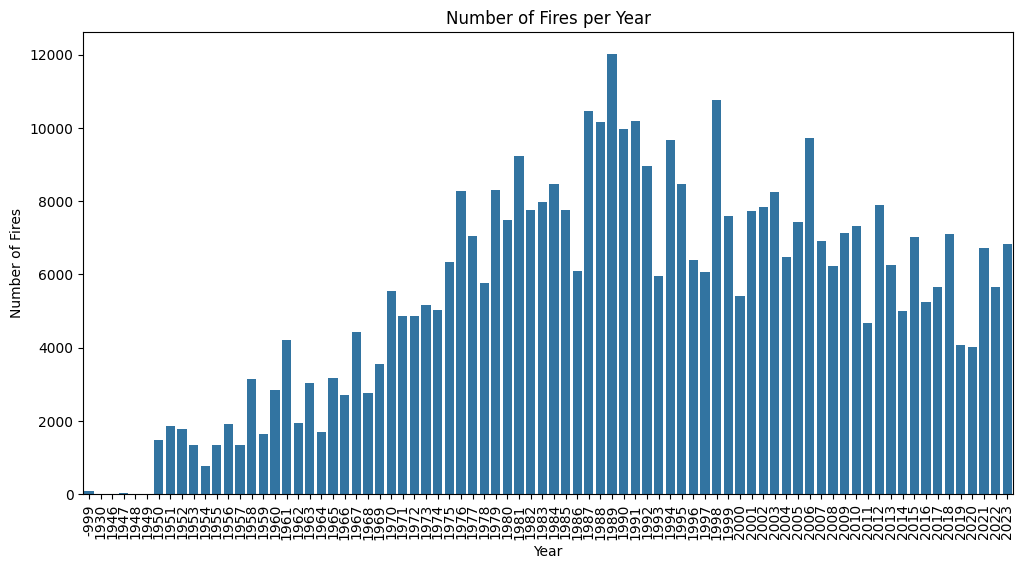

In [19]:
#  plot per year

year_counts = df.groupby('YEAR').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='count', data=year_counts)
plt.title('Number of Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=90)
plt.show()


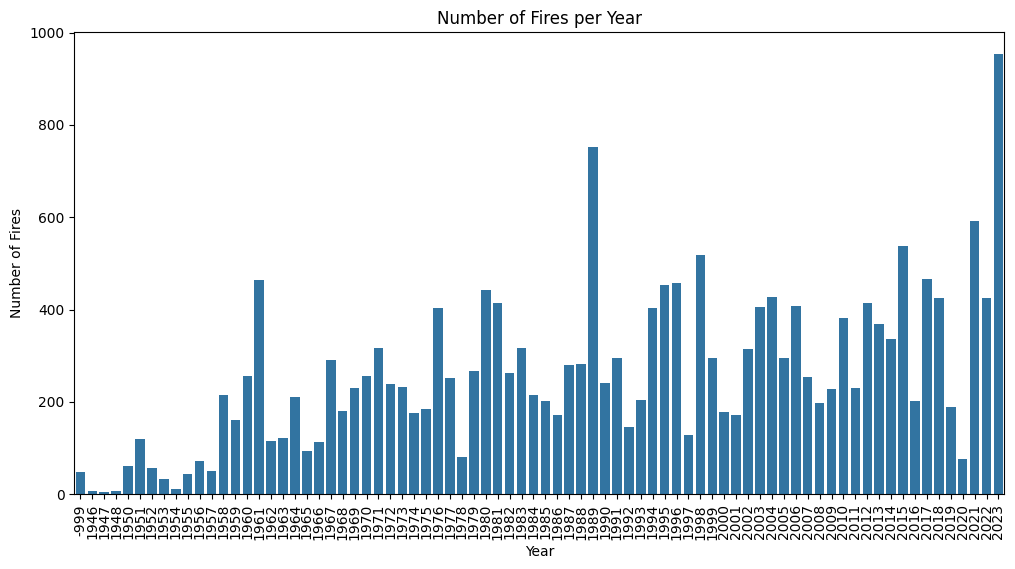

In [20]:
#  plot per year (bigger fire size)

year_counts = df[df['SIZE_HA']>size].groupby('YEAR').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='count', data=year_counts)
plt.title('Number of Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering and Feature Selection

   SIZE_HA SIZE_HA_CLASS
0    0.010            no
1    1.400           yes
2    0.009            no
3    1.100           yes
4    0.009            no
5    1.000           yes
6    3.500           yes
7    0.200           yes
8    0.040            no
9    0.100            no


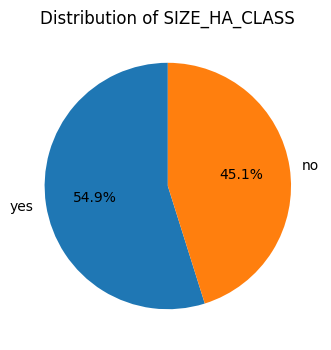

In [21]:
# Feature Engineering and Feature Selection

def size_ha_classifier(size):
  if size > 0.1:
    return 'yes'
  else:
    return 'no'

df['SIZE_HA_CLASS'] = df['SIZE_HA'].apply(size_ha_classifier)
print(df[['SIZE_HA', 'SIZE_HA_CLASS']].head(10))

plt.figure(figsize=(4, 4))  # Adjust figure size as needed
df['SIZE_HA_CLASS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of SIZE_HA_CLASS')
plt.ylabel('') # remove the y-axis label
plt.show()

# Select relevant features and target variable
features = ['LATITUDE', 'LONGITUDE', 'YEAR', 'MONTH', 'DAY']  # Add other relevant features if needed
# target = 'SIZE_HA'
target = 'SIZE_HA_CLASS'

# Handle missing values (important!)
df = df.dropna(subset=[target] + features)  # Remove rows with NaN in target or features

# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [25]:
# Hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 5, 10],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

# Create the model
rf_classifier = RandomForestClassifier(random_state=42, verbose=True)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.7s


Best hyperparameters: {'max_depth': 10, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Accuracy: 0.7449406159449338
              precision    recall  f1-score   support

          no       0.70      0.76      0.73     39311
         yes       0.79      0.73      0.76     48002

    accuracy                           0.74     87313
   macro avg       0.74      0.75      0.74     87313
weighted avg       0.75      0.74      0.75     87313



# Model Evaluation

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


              precision    recall  f1-score   support

          no       0.70      0.76      0.73     39311
         yes       0.79      0.73      0.76     48002

    accuracy                           0.74     87313
   macro avg       0.74      0.75      0.74     87313
weighted avg       0.75      0.74      0.75     87313



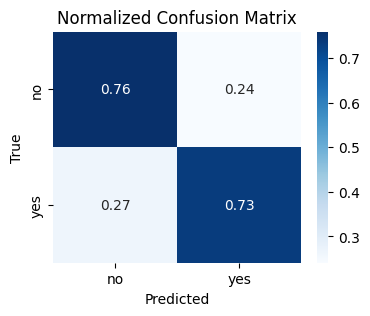

In [31]:
# Evaluate the best model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(4, 3))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

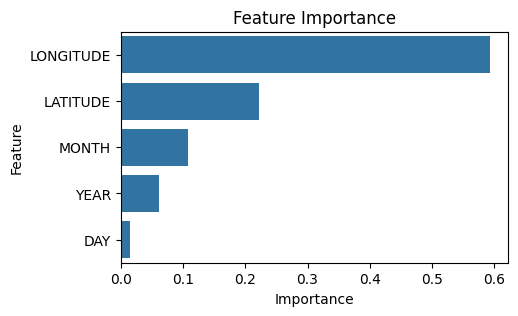

In [32]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
